In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [2]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://cusy.io/en', 30232)
('https://jupyter-tutorial.readthedocs.io/en/latest/', 78705)
('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://github.com/veit/pyviz-tutorial/', 193614)
('https://github.com/veit/jupyter-tutorial/', 223414)


In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  3
index  3
SI
irandom  3
index  6
SI
irandom  0
index  6
NO, segundo intento
index  6
SI
irandom  0
index  7
Program finished in 0.0007384000000456581 seconds - using serial


In [5]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

3492368

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

3492368

In [10]:
array_Ytrain

array([[0.35434783],
       [0.34130435],
       [0.35869565],
       ...,
       [0.7       ],
       [0.69565217],
       [0.69130435]])

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

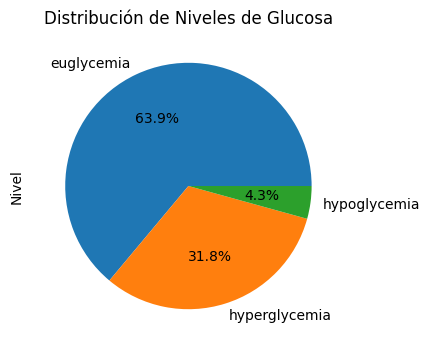

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232250
hyperglycemia    1110305
hypoglycemia      149813
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,197.0,hyperglycemia
2,205.0,hyperglycemia
3,209.0,hyperglycemia
4,204.0,hyperglycemia
...,...,...
3492363,361.0,hyperglycemia
3492364,364.0,hyperglycemia
3492365,362.0,hyperglycemia
3492366,360.0,hyperglycemia


In [15]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

34924


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 33713
Program finished in 1.2574190000013914 seconds - using multiprocessing
1 67647
Program finished in 1.1946785999989515 seconds - using multiprocessing
2 101839
Program finished in 1.1720110000005661 seconds - using multiprocessing
3 135008
Program finished in 2.1029295999996975 seconds - using multiprocessing
4 169269
Program finished in 1.2288504000007379 seconds - using multiprocessing
5 203672
Program finished in 1.3941706999994494 seconds - using multiprocessing
6 235348
Program finished in 3.7262994999982766 seconds - using multiprocessing
7 266391
Program finished in 4.470595700000558 seconds - using multiprocessing
8 296694
Program finished in 5.11997700000029 seconds - using multiprocessing
9 326349
Program finished in 6.387365399999908 seconds - using multiprocessing
10 356217
Program finished in 6.188223200000721 seconds - using multiprocessing
11 387170
Program finished in 4.885383900000306 seconds - using multiprocessing
12 417607
Program finished in 5.66370330000063

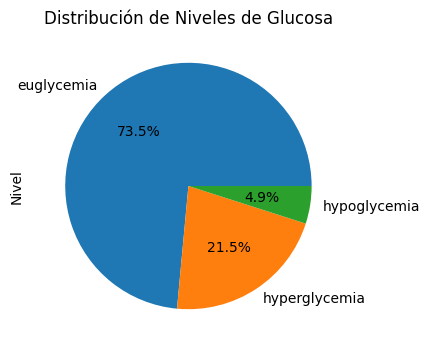

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232250
hyperglycemia     654086
hypoglycemia      149813
Name: Nivel, dtype: int64

<AxesSubplot: >

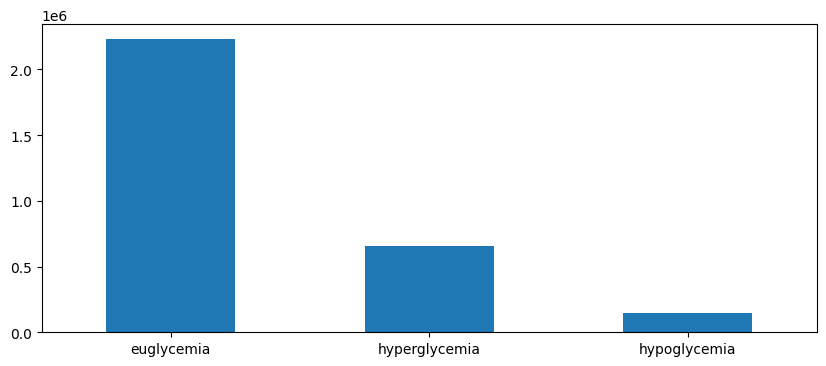

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

3036149

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [26]:
len(YNew)

3036149

In [27]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

30362


In [28]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 19460
Program finished in 6.347114600001078 seconds - using multiprocessing
1 38713
Program finished in 6.822645100000955 seconds - using multiprocessing
2 57587
Program finished in 6.790532600000006 seconds - using multiprocessing
3 76315
Program finished in 7.127850699998817 seconds - using multiprocessing
4 95591
Program finished in 7.029490400000213 seconds - using multiprocessing
5 114242
Program finished in 7.3715106999989075 seconds - using multiprocessing
6 132666
Program finished in 8.087593799999013 seconds - using multiprocessing
7 153671
Program finished in 6.2119477999985975 seconds - using multiprocessing
8 175255
Program finished in 6.603017400000681 seconds - using multiprocessing
9 197265
Program finished in 6.015513800000917 seconds - using multiprocessing
10 219217
Program finished in 6.0444683999994595 seconds - using multiprocessing
11 240780
Program finished in 6.45990829999937 seconds - using multiprocessing
12 261922
Program finished in 6.575743800000055 secon

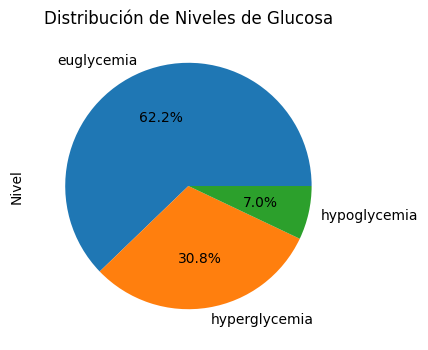

In [29]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [30]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1323173
hyperglycemia     654086
hypoglycemia      149813
Name: Nivel, dtype: int64

In [31]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

21271


In [32]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 14143
Program finished in 4.232867099999567 seconds - using multiprocessing
1 27972
Program finished in 3.768794600000547 seconds - using multiprocessing
2 41555
Program finished in 3.9236976000029244 seconds - using multiprocessing
3 55569
Program finished in 3.772055500001443 seconds - using multiprocessing
4 68778
Program finished in 4.393662700000277 seconds - using multiprocessing
5 81850
Program finished in 4.3154094999990775 seconds - using multiprocessing
6 96746
Program finished in 3.4445725999976275 seconds - using multiprocessing
7 112851
Program finished in 3.0455765000006068 seconds - using multiprocessing
8 128976
Program finished in 3.1826307000010274 seconds - using multiprocessing
9 145723
Program finished in 2.9146725999999035 seconds - using multiprocessing
10 161999
Program finished in 3.075809500001924 seconds - using multiprocessing
11 177865
Program finished in 3.2356145000012475 seconds - using multiprocessing
12 193155
Program finished in 3.78442559999894 sec

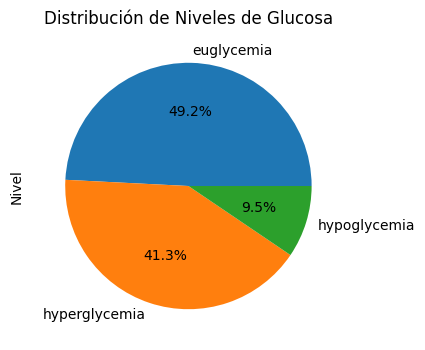

In [33]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [34]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       778546
hyperglycemia    654086
hypoglycemia     149813
Name: Nivel, dtype: int64

In [35]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [36]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [37]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

15825
0 11080
Program finished in 3.189933400000882 seconds - using multiprocessing
1 21734
Program finished in 2.69014099999913 seconds - using multiprocessing
2 32712
Program finished in 2.3302351999991515 seconds - using multiprocessing
3 42850
Program finished in 2.569077100000868 seconds - using multiprocessing
4 52636
Program finished in 3.0779633999991347 seconds - using multiprocessing
5 64282
Program finished in 2.292639199997211 seconds - using multiprocessing
6 76827
Program finished in 1.9088671999998041 seconds - using multiprocessing
7 89643
Program finished in 1.7940936999984842 seconds - using multiprocessing
8 102889
Program finished in 1.5376255999981367 seconds - using multiprocessing
9 115898
Program finished in 1.667848099998082 seconds - using multiprocessing
10 128499
Program finished in 1.9144847999996273 seconds - using multiprocessing
11 140666
Program finished in 2.605078799999319 seconds - using multiprocessing
12 152897
Program finished in 2.493216599999868

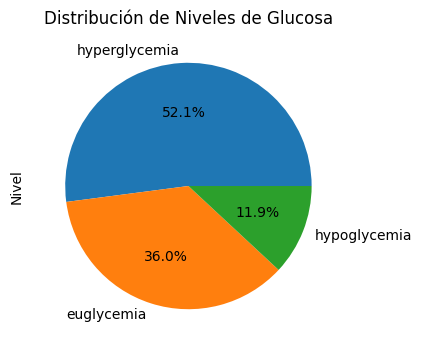

In [38]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    654086
euglycemia       452373
hypoglycemia     149813
Name: Nivel, dtype: int64

In [40]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

12563
0 11673
Program finished in 0.842248799999652 seconds - using multiprocessing
1 22946
Program finished in 0.9800305999997363 seconds - using multiprocessing
2 34740
Program finished in 0.6768615000000864 seconds - using multiprocessing
3 46950
Program finished in 0.42932659999860334 seconds - using multiprocessing
4 57719
Program finished in 1.272858799999085 seconds - using multiprocessing
5 68324
Program finished in 1.5398505999983172 seconds - using multiprocessing
6 78256
Program finished in 2.104626600001211 seconds - using multiprocessing
7 88192
Program finished in 2.267004100001941 seconds - using multiprocessing
8 97634
Program finished in 2.7724880000023404 seconds - using multiprocessing
9 107813
Program finished in 2.360790200000338 seconds - using multiprocessing
10 117805
Program finished in 2.2954439999994065 seconds - using multiprocessing
11 127762
Program finished in 2.3054873000000953 seconds - using multiprocessing
12 137246
Program finished in 2.4941435000000

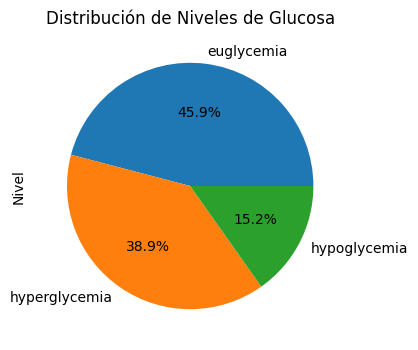

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       452373
hyperglycemia    382967
hypoglycemia     149813
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

9852
0 7104
Program finished in 1.0039276000024984 seconds - using multiprocessing
1 13878
Program finished in 0.8192813000023307 seconds - using multiprocessing
2 20803
Program finished in 0.8346182999994198 seconds - using multiprocessing
3 27230
Program finished in 0.8645055000015418 seconds - using multiprocessing
4 33420
Program finished in 0.9231650000001537 seconds - using multiprocessing
5 40831
Program finished in 0.7593172999986564 seconds - using multiprocessing
6 48835
Program finished in 0.6813442999991821 seconds - using multiprocessing
7 56934
Program finished in 0.681814999999915 seconds - using multiprocessing
8 65315
Program finished in 0.693210999997973 seconds - using multiprocessing
9 73668
Program finished in 0.8007956000001286 seconds - using multiprocessing
10 81751
Program finished in 0.7940471000001708 seconds - using multiprocessing
11 89449
Program finished in 1.0126650999991398 seconds - using multiprocessing
12 97148
Program finished in 0.9603236000002653 

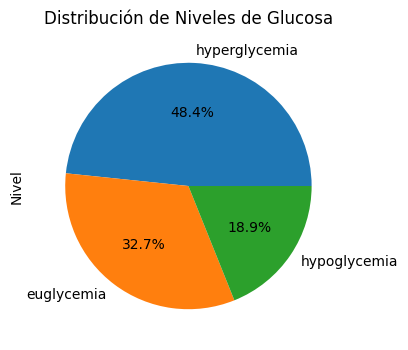

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    382967
euglycemia       259217
hypoglycemia     149813
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7920
0 7452
Program finished in 0.21128179999868735 seconds - using multiprocessing
1 14572
Program finished in 0.1631061000007321 seconds - using multiprocessing
2 22025
Program finished in 0.1588469999987865 seconds - using multiprocessing
3 29736
Program finished in 0.1832079000014346 seconds - using multiprocessing
4 36632
Program finished in 0.3091673999988416 seconds - using multiprocessing
5 43540
Program finished in 0.3457383999993908 seconds - using multiprocessing
6 50005
Program finished in 0.5026993999999831 seconds - using multiprocessing
7 56456
Program finished in 0.5255876000010176 seconds - using multiprocessing
8 62561
Program finished in 0.6488102000002982 seconds - using multiprocessing
9 69130
Program finished in 0.5704249999980675 seconds - using multiprocessing
10 75507
Program finished in 0.7117741999973077 seconds - using multiprocessing
11 82007
Program finished in 0.7382097999980033 seconds - using multiprocessing
12 88025
Program finished in 0.85495939999964

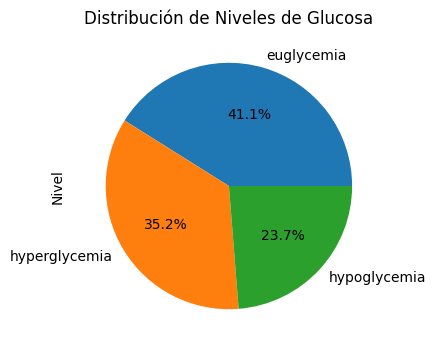

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [50]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       259217
hyperglycemia    222046
hypoglycemia     149813
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

Cargamos nuevamente para evitar perder todo el trabajo debido a la demora del proceso

In [12]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [13]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [14]:
len(array_Xtrain)

631076

In [15]:
len(array_Ytrain)

631076

In [16]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

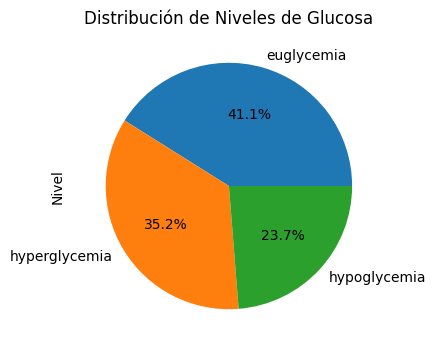

In [17]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [18]:
df_Y_scaled

,Glucose level,Nivel
0,57.0,hypoglycemia
1,57.0,hypoglycemia
2,60.0,hypoglycemia
3,62.0,hypoglycemia
4,60.0,hypoglycemia
...,...,...
631071,410.0,hyperglycemia
631072,477.0,hyperglycemia
631073,421.8,hyperglycemia
631074,291.0,hyperglycemia


In [19]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       259217
hyperglycemia    222046
hypoglycemia     149813
Name: Nivel, dtype: int64

In [20]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.4,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

6311
0 4956
Program finished in 0.16992079999999987 seconds - using multiprocessing
1 9601
Program finished in 0.2086428000000069 seconds - using multiprocessing
2 14251
Program finished in 0.19296959999996943 seconds - using multiprocessing
3 18567
Program finished in 0.23938730000008945 seconds - using multiprocessing
4 22674
Program finished in 0.2712607000000844 seconds - using multiprocessing
5 27730
Program finished in 0.1740940000000819 seconds - using multiprocessing
6 33169
Program finished in 0.16969529999994393 seconds - using multiprocessing
7 38747
Program finished in 0.17290609999997741 seconds - using multiprocessing
8 44369
Program finished in 0.19642190000001847 seconds - using multiprocessing
9 50001
Program finished in 0.2336281999999983 seconds - using multiprocessing
10 55499
Program finished in 0.2578917000000729 seconds - using multiprocessing
11 60747
Program finished in 0.30038309999997637 seconds - using multiprocessing
12 65967
Program finished in 0.331962700

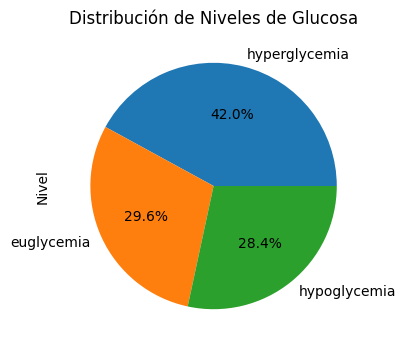

In [21]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [22]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    222046
euglycemia       156228
hypoglycemia     149813
Name: Nivel, dtype: int64

<AxesSubplot: >

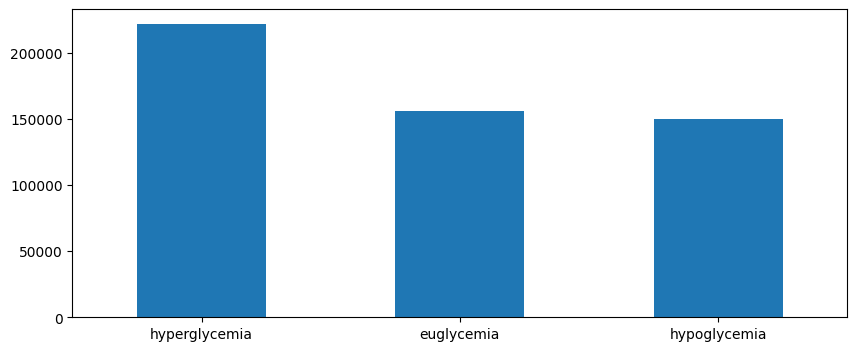

In [23]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [24]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

In [53]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [54]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [55]:
len(array_Xtrain)

528087

In [56]:
len(array_Ytrain)

528087

In [57]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

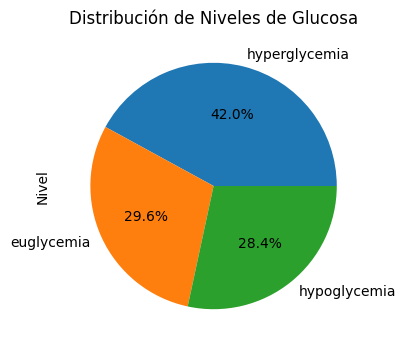

In [58]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [59]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    222046
euglycemia       156228
hypoglycemia     149813
Name: Nivel, dtype: int64

In [60]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

5281
0 5151
Program finished in 0.07826010000007955 seconds - using multiprocessing
1 10148
Program finished in 0.05245739999986654 seconds - using multiprocessing
2 15240
Program finished in 0.06640249999986736 seconds - using multiprocessing
3 20449
Program finished in 0.09030410000013944 seconds - using multiprocessing
4 25337
Program finished in 0.11893589999999676 seconds - using multiprocessing
5 30243
Program finished in 0.15295390000005682 seconds - using multiprocessing
6 35061
Program finished in 0.18806130000007215 seconds - using multiprocessing
7 39847
Program finished in 0.227028399999881 seconds - using multiprocessing
8 44498
Program finished in 0.3502525000001242 seconds - using multiprocessing
9 49243
Program finished in 0.36433360000000903 seconds - using multiprocessing
10 53939
Program finished in 0.4088816000000861 seconds - using multiprocessing
11 58600
Program finished in 0.49103470000000016 seconds - using multiprocessing
12 63160
Program finished in 0.5611715

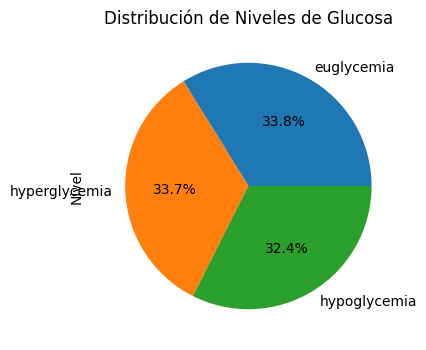

In [61]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [62]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       156228
hyperglycemia    155852
hypoglycemia     149813
Name: Nivel, dtype: int64

In [63]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'wb') as f:
    np.save(f, XNew)

In [64]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [65]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [66]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [67]:
len(array_Ytrain)

461893

In [68]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

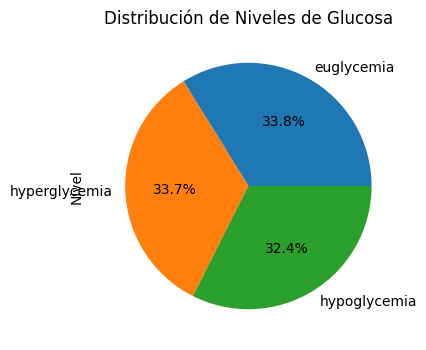

In [69]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [70]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       156228
hyperglycemia    155852
hypoglycemia     149813
Name: Nivel, dtype: int64

In [71]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [72]:
minClass

149813

In [73]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

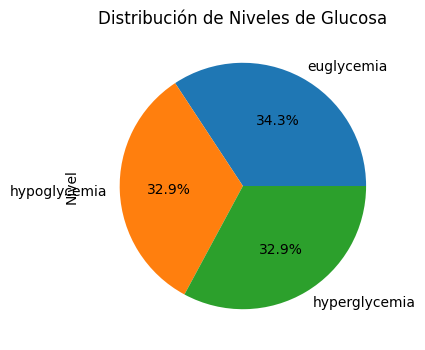

In [74]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [75]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       156228
hypoglycemia     149813
hyperglycemia    149813
Name: Nivel, dtype: int64

In [76]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

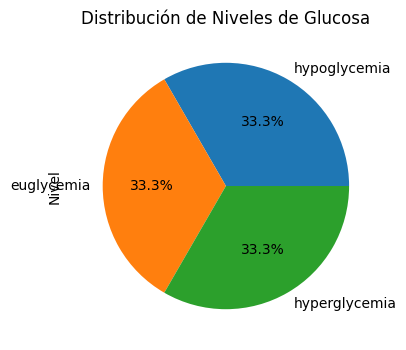

In [77]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [78]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     149813
euglycemia       149813
hyperglycemia    149813
Name: Nivel, dtype: int64

<AxesSubplot: >

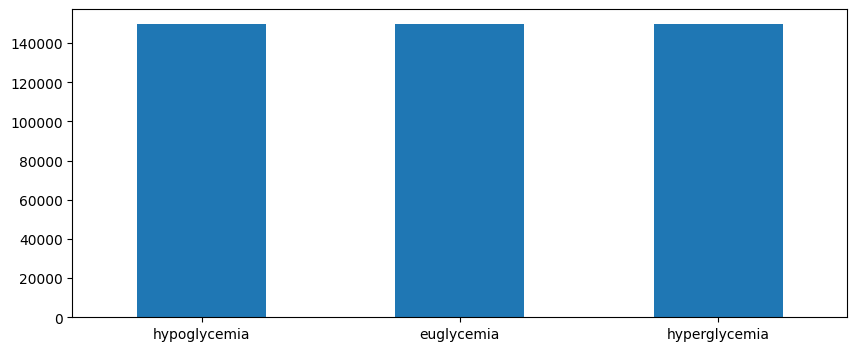

In [79]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [80]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [81]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [97]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [98]:
len(array_Xval)

436549

In [99]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [100]:
len(array_Yval)

436549

In [101]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

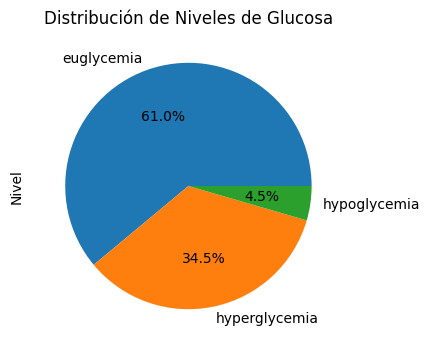

In [102]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [103]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       266498
hyperglycemia    150402
hypoglycemia      19649
Name: Nivel, dtype: int64

<AxesSubplot: >

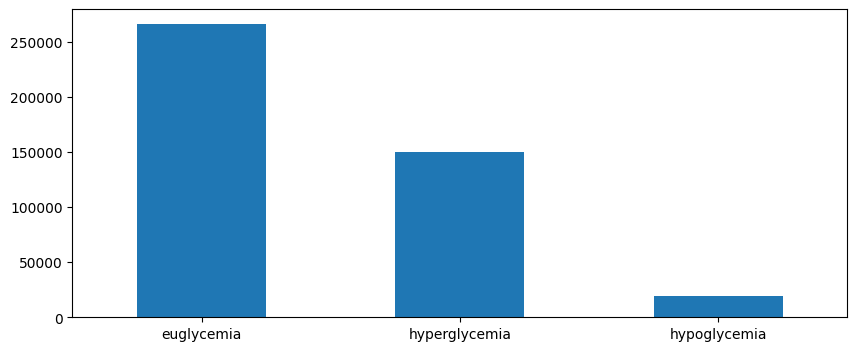

In [104]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [105]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

4366


In [106]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 2813
Program finished in 0.24935869999899296 seconds - using multiprocessing
1 5594
Program finished in 0.18662609999955748 seconds - using multiprocessing
2 8318
Program finished in 0.19490479999876698 seconds - using multiprocessing
3 10971
Program finished in 0.15113869999913732 seconds - using multiprocessing
4 13659
Program finished in 0.19626880000214442 seconds - using multiprocessing
5 16410
Program finished in 0.2035117999985232 seconds - using multiprocessing
6 19579
Program finished in 0.18196639999951003 seconds - using multiprocessing
7 22987
Program finished in 0.17913929999849643 seconds - using multiprocessing
8 26285
Program finished in 0.20822920000136946 seconds - using multiprocessing
9 29379
Program finished in 0.2285014000008232 seconds - using multiprocessing
10 32678
Program finished in 0.2460334999996121 seconds - using multiprocessing
11 35914
Program finished in 0.28978409999763244 seconds - using multiprocessing
12 39040
Program finished in 0.3296708999987

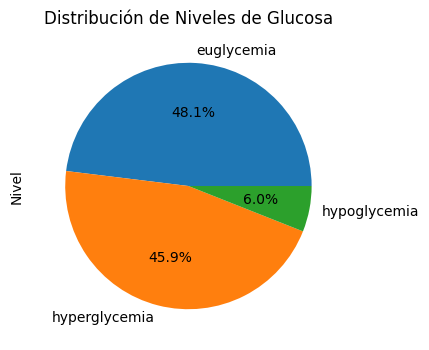

In [107]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [108]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       157340
hyperglycemia    150402
hypoglycemia      19649
Name: Nivel, dtype: int64

In [109]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [110]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [111]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3274
0 2167
Program finished in 0.10726159999830998 seconds - using multiprocessing
1 4329
Program finished in 0.10131130000081612 seconds - using multiprocessing
2 6379
Program finished in 0.12668789999952423 seconds - using multiprocessing
3 8442
Program finished in 0.1297452999970119 seconds - using multiprocessing
4 10548
Program finished in 0.136376400001609 seconds - using multiprocessing
5 13075
Program finished in 0.10572289999981876 seconds - using multiprocessing
6 15788
Program finished in 0.10935529999915161 seconds - using multiprocessing
7 18425
Program finished in 0.12587019999773474 seconds - using multiprocessing
8 20842
Program finished in 0.14808059999995749 seconds - using multiprocessing
9 23469
Program finished in 0.13340230000176234 seconds - using multiprocessing
10 26039
Program finished in 0.15430859999833046 seconds - using multiprocessing
11 28556
Program finished in 0.1824704999999085 seconds - using multiprocessing
12 31036
Program finished in 0.2247712000

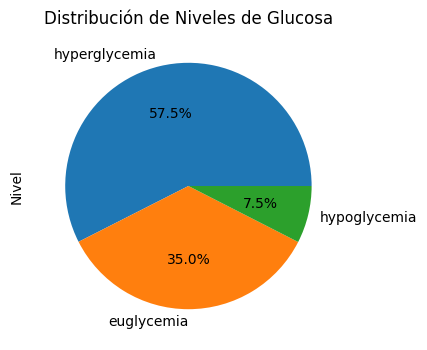

In [112]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [113]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    150402
euglycemia        91609
hypoglycemia      19649
Name: Nivel, dtype: int64

In [114]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2617
0 2519
Program finished in 0.137861499999417 seconds - using multiprocessing
1 5029
Program finished in 0.061993300001631724 seconds - using multiprocessing
2 7558
Program finished in 0.06452740000167978 seconds - using multiprocessing
3 9974
Program finished in 0.05908569999883184 seconds - using multiprocessing
4 12048
Program finished in 0.1061362000000372 seconds - using multiprocessing
5 13922
Program finished in 0.12575120000110473 seconds - using multiprocessing
6 15887
Program finished in 0.12094559999968624 seconds - using multiprocessing
7 17967
Program finished in 0.11991300000227056 seconds - using multiprocessing
8 19957
Program finished in 0.13885429999936605 seconds - using multiprocessing
9 22026
Program finished in 0.15099000000191154 seconds - using multiprocessing
10 24041
Program finished in 0.17382509999879403 seconds - using multiprocessing
11 26060
Program finished in 0.175299399998039 seconds - using multiprocessing
12 28173
Program finished in 0.1778467999

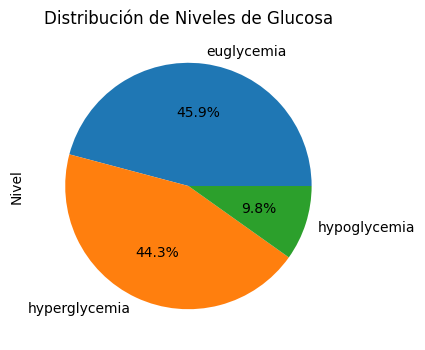

In [115]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       91609
hyperglycemia    88484
hypoglycemia     19649
Name: Nivel, dtype: int64

In [117]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [118]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [119]:
len(XNew)

199742

<AxesSubplot: >

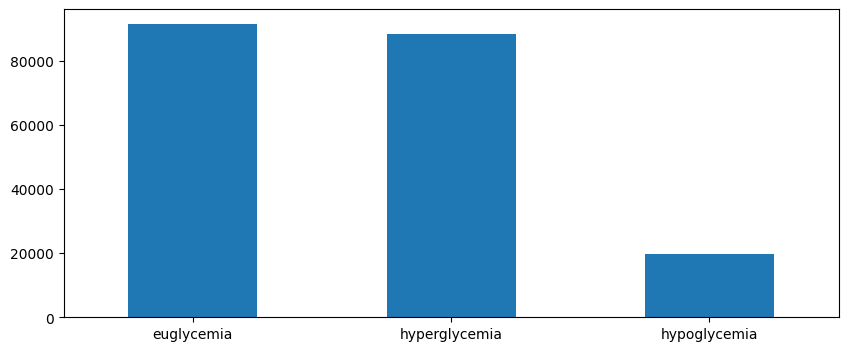

In [120]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [121]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1998
0 1370
Program finished in 0.10243020000052638 seconds - using multiprocessing
1 2722
Program finished in 0.07826409999688622 seconds - using multiprocessing
2 3998
Program finished in 0.08483439999690745 seconds - using multiprocessing
3 5244
Program finished in 0.08128399999986868 seconds - using multiprocessing
4 6531
Program finished in 0.08392989999993006 seconds - using multiprocessing
5 8070
Program finished in 0.07125290000112727 seconds - using multiprocessing
6 9721
Program finished in 0.06600410000100965 seconds - using multiprocessing
7 11338
Program finished in 0.07335610000154702 seconds - using multiprocessing
8 12858
Program finished in 0.10953219999646535 seconds - using multiprocessing
9 14479
Program finished in 0.08706789999996545 seconds - using multiprocessing
10 16052
Program finished in 0.09328500000265194 seconds - using multiprocessing
11 17582
Program finished in 0.12094230000002426 seconds - using multiprocessing
12 19099
Program finished in 0.127466699

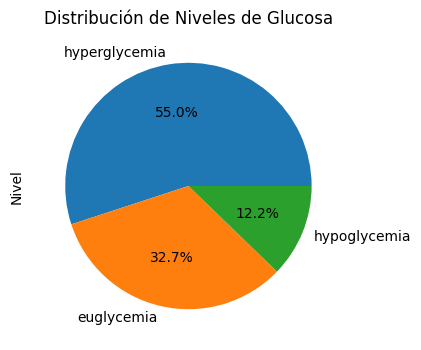

In [122]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [123]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    88484
euglycemia       52642
hypoglycemia     19649
Name: Nivel, dtype: int64

In [124]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1608
0 1565
Program finished in 0.06075840000266908 seconds - using multiprocessing
1 3115
Program finished in 0.03143360000103712 seconds - using multiprocessing
2 4668
Program finished in 0.03389690000039991 seconds - using multiprocessing
3 6172
Program finished in 0.03836640000008629 seconds - using multiprocessing
4 7446
Program finished in 0.06292929999835906 seconds - using multiprocessing
5 8622
Program finished in 0.08366090000345139 seconds - using multiprocessing
6 9825
Program finished in 0.0847384000007878 seconds - using multiprocessing
7 11104
Program finished in 0.08048620000045048 seconds - using multiprocessing
8 12343
Program finished in 0.09032200000001467 seconds - using multiprocessing
9 13633
Program finished in 0.08867910000117263 seconds - using multiprocessing
10 14852
Program finished in 0.10423620000074152 seconds - using multiprocessing
11 16108
Program finished in 0.10439860000042245 seconds - using multiprocessing
12 17408
Program finished in 0.1062235999

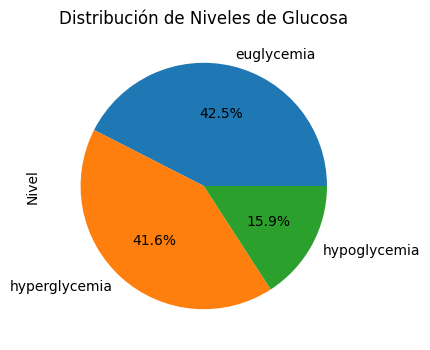

In [125]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [126]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       52642
hyperglycemia    51597
hypoglycemia     19649
Name: Nivel, dtype: int64

In [127]:
with open('dataset/generado/dataset15min/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [128]:
with open('dataset/generado/dataset15min/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [129]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1239
0 890
Program finished in 0.04774909999832744 seconds - using multiprocessing
1 1731
Program finished in 0.03253289999702247 seconds - using multiprocessing
2 2567
Program finished in 0.03411480000067968 seconds - using multiprocessing
3 3353
Program finished in 0.03899939999973867 seconds - using multiprocessing
4 4157
Program finished in 0.042891400000371505 seconds - using multiprocessing
5 5101
Program finished in 0.043459799999254756 seconds - using multiprocessing
6 6134
Program finished in 0.04076549999808776 seconds - using multiprocessing
7 7144
Program finished in 0.04796100000021397 seconds - using multiprocessing
8 8084
Program finished in 0.05240670000057435 seconds - using multiprocessing
9 9088
Program finished in 0.05837050000263844 seconds - using multiprocessing
10 10101
Program finished in 0.06533499999932246 seconds - using multiprocessing
11 11075
Program finished in 0.0624126000002434 seconds - using multiprocessing
12 11988
Program finished in 0.072907199999

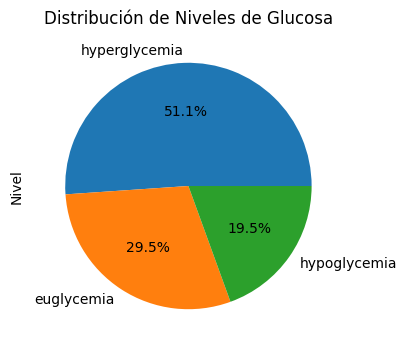

In [130]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [131]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    51597
euglycemia       29759
hypoglycemia     19649
Name: Nivel, dtype: int64

In [132]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1011
0 992
Program finished in 0.022577600000659004 seconds - using multiprocessing
1 1971
Program finished in 0.01926649999950314 seconds - using multiprocessing
2 2951
Program finished in 0.026765100003103726 seconds - using multiprocessing
3 3901
Program finished in 0.02912090000245371 seconds - using multiprocessing
4 4726
Program finished in 0.039206499997817446 seconds - using multiprocessing
5 5483
Program finished in 0.042599099997460144 seconds - using multiprocessing
6 6254
Program finished in 0.041106199998466764 seconds - using multiprocessing
7 7068
Program finished in 0.04720119999910821 seconds - using multiprocessing
8 7855
Program finished in 0.05012830000123358 seconds - using multiprocessing
9 8663
Program finished in 0.0505671999999322 seconds - using multiprocessing
10 9419
Program finished in 0.06039489999966463 seconds - using multiprocessing
11 10196
Program finished in 0.06371340000259806 seconds - using multiprocessing
12 11036
Program finished in 0.0600698000

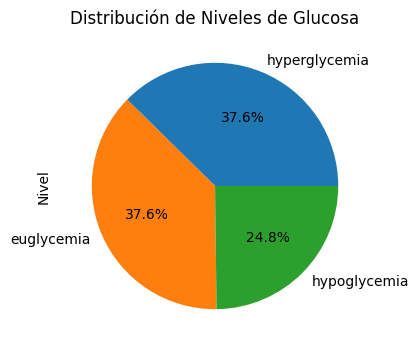

In [133]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [134]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    29818
euglycemia       29759
hypoglycemia     19649
Name: Nivel, dtype: int64

In [135]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [136]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [137]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'rb') as f:
    array_Xval = np.load(f)

In [138]:
len(array_Xval)

79226

In [139]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'rb') as f:
    array_Yval = np.load(f)

In [140]:
len(array_Yval)

79226

In [141]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

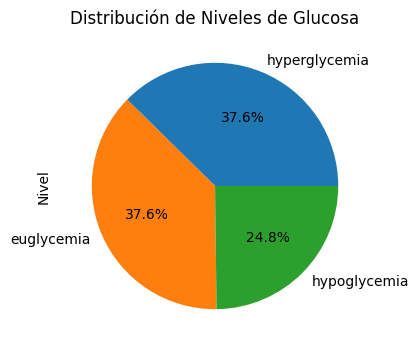

In [142]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [143]:
df_Yval_scaled['Nivel'].value_counts()

hyperglycemia    29818
euglycemia       29759
hypoglycemia     19649
Name: Nivel, dtype: int64

In [144]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

19649

In [145]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [146]:
len(YnewLabel)

69057

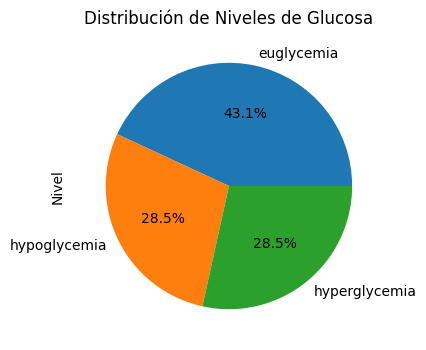

In [147]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [148]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29759
hypoglycemia     19649
hyperglycemia    19649
Name: Nivel, dtype: int64

In [149]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

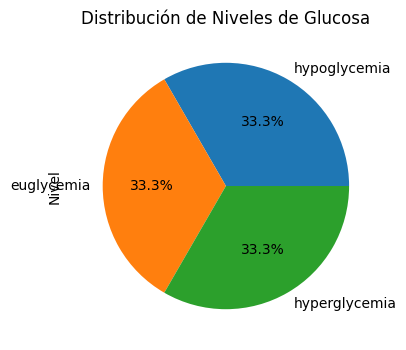

In [150]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [151]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     19649
euglycemia       19649
hyperglycemia    19649
Name: Nivel, dtype: int64

<AxesSubplot: >

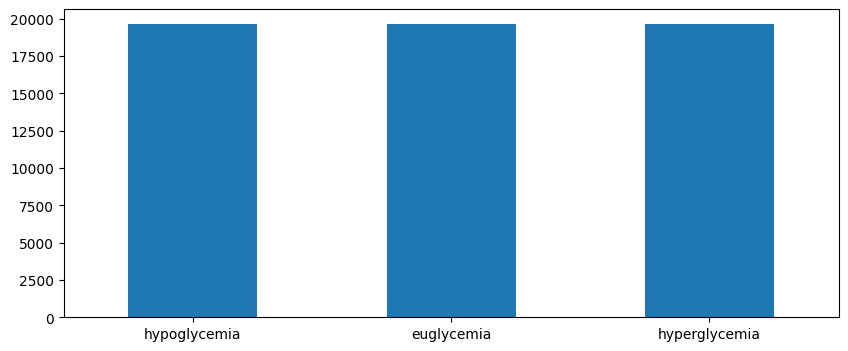

In [152]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [153]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [154]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)